In [1]:
# Evelina Ramoskaite
# Textblob
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import itertools
import collections

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings("ignore")




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Edvinas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:

current_path = os.getcwd()
print(current_path)

C:\Users\Edvinas\PycharmProjects\CapstoneProject\venv


In [3]:
# Loading the Data

data = pd.read_csv('rated_GOOGL.csv')
data.columns

Index(['timestamp', 'tweet_text', 'all_hashtags', 'retweet_count',
       'tweet_created_at', ' username', 'followers_count', 'target'],
      dtype='object')

In [4]:
# Decoding the text columns
#import ast
#data.tweet_text = data['tweet_text'].apply(ast.literal_eval).str.decode("utf-8")
#data.username = data[' username'].apply(ast.literal_eval).str.decode("utf-8")

In [5]:
# Tweets
data.tweet_text.head(10)

0    Today's Watchlist includes $GE $MFST $F $SL $M...
1    @1MainCapital I don’t think you can answer thi...
2    China Says 33 Apps Break Rules in Gathering Us...
3    [Last 24 Hours]  Stocks trending among elite #...
4    Mega cap stock and option trading model subscr...
5    5/3 WL  $TSLA calls over 718, resistance at 72...
6    $GOOGL weekly outlook: Raising pivot/sup 2295....
7    @WillPan23822266 Yeah but...  ...it’s exactly ...
8    #eth has not so smart "smart contract",but ind...
9    @cperruna @alphacharts365 A lot of folks try t...
Name: tweet_text, dtype: object

In [6]:
data.head(15)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,Today's Watchlist includes $GE $MFST $F $SL $M...,[],0,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,@1MainCapital I don’t think you can answer thi...,[],0,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,China Says 33 Apps Break Rules in Gathering Us...,[],4,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...",0,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,Mega cap stock and option trading model subscr...,[],0,5/3/2021 0:17,ProfectuSystems,422,neutral
5,5/3/2021 0:21,"5/3 WL $TSLA calls over 718, resistance at 72...",[],0,5/3/2021 0:21,ColtenRaider,510,positive
6,5/3/2021 0:23,$GOOGL weekly outlook: Raising pivot/sup 2295....,['StocksToTrade'],1,5/3/2021 0:23,mktparticipants,1572,positive
7,5/3/2021 0:25,@WillPan23822266 Yeah but... ...it’s exactly ...,[],0,5/3/2021 0:25,Wexboy_Value,6581,positive
8,5/3/2021 0:25,"#eth has not so smart ""smart contract"",but ind...","['eth', 'eth', 'bitcoin', 'bitcoin', 'litecoin...",1,5/3/2021 0:25,solaris23290390,1,neutral
9,5/3/2021 0:35,@cperruna @alphacharts365 A lot of folks try t...,[],0,5/3/2021 0:35,henleym25,142,negative


### Data Cleaning

In [7]:
# Preprocessing stage
import re  
  

In [8]:
#preprocess tweets

data.tweet_text =data.tweet_text.str.lower()  #tranform tweet col to lower case

#Remove handlers

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove hashtags

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("#", "", x))

# Remove $

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("!", "", x))

#remove all single characters

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))




In [9]:
# Tokenization
def tokenize(tweets):
    all_tweets = []
    for tweet in tweets:
        words = word_tokenize(tweet) 
        all_tweets.append(tweet)
    return all_tweets

In [10]:
data.tweet_text=tokenize(data.tweet_text)

In [11]:
data.tweet_text

0      today's watchlist includes $ge $mfst $f $sl $m...
1      don’t think you can answer this without substi...
2      china says 33 apps break rules in gathering us...
3      [last 24 hours] stocks trending among elite fi...
4      mega cap stock and option trading model subscr...
                             ...                        
412    $sbux hourly $aapl $googl $amzn $pypl $sq $mu ...
413    market caps 1. apple $aapl $2.2 trillion 2. al...
414    due to decreased vaccination demand, my assign...
415    google...what cansay google googl stock tech i...
416    capitalize on the negative overreaction toward...
Name: tweet_text, Length: 417, dtype: object

In [12]:
# Stemming
def stemmer(tweets):
    ps = PorterStemmer()
    all_tweets = []
    for tweet in tweets:
        all_words = []
        for word in tweets:
            words = ps.stem(tweet) 
            all_words.append(words)
        all_tweets.append(all_words)
    return all_tweets

### Exploratory Analysis

In [13]:
data.describe().round(2)

,retweet_count,followers_count
count,417.00,417.00
mean,0.71,6857.84
std,4.37,30324.92
min,0.00,0.00
25%,0.00,154.00
50%,0.00,481.00
75%,0.00,3650.00
max,69.00,359999.00


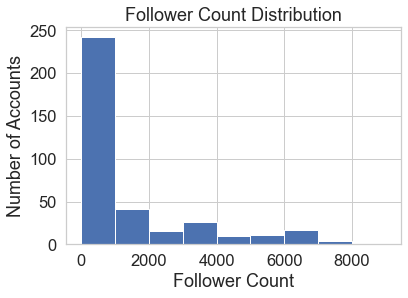

In [14]:
# follower counts
plt.hist(data['followers_count'],bins=range(0,10000,1000))
plt.xlabel('Follower Count')
plt.ylabel('Number of Accounts')
plt.title('Follower Count Distribution')
plt.show()

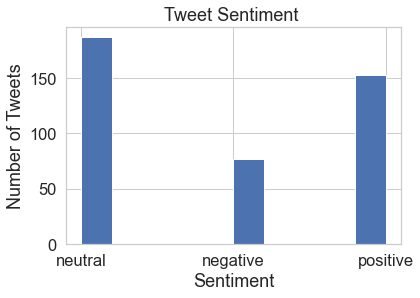

In [15]:
# Plotting vader sentiment score distribution
plt.hist(data.target)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Tweet Sentiment ')
plt.show()

In [16]:
# Comparing Follower and Retweet count for each category of sentiment 
data_positive = data.query('target=="positive"')
data_negative = data.query('target=="negative"')
data_neutral = data.query('target=="neutral"')


In [17]:
temp1 = data_positive["followers_count"].mean()
temp2 = data_neutral["followers_count"].mean()
temp3 = data_negative["followers_count"].mean()
print("Mean Follower Count (Positive) : " + str(temp1))
print("Mean Follower Count (Neutral) : " + str(temp2))
print("Mean Follower Count (Negative) : " + str(temp3))


Mean Follower Count (Positive) : 6647.6274509803925
Mean Follower Count (Neutral) : 7601.743315508022
Mean Follower Count (Negative) : 5468.935064935065


In [18]:
temp1 = data_positive["retweet_count"].mean()
temp2 = data_neutral["retweet_count"].mean()
temp3 = data_negative["retweet_count"].mean()
print("Mean Retweet Count (Positive) : " + str(temp1))
print("Mean Retweet Count (Neutral) : " + str(temp2))
print("Mean Retweet Count (Negative) : " + str(temp3))


Mean Retweet Count (Positive) : 0.5620915032679739
Mean Retweet Count (Neutral) : 1.0588235294117647
Mean Retweet Count (Negative) : 0.18181818181818182


In [19]:
data2=pd.get_dummies(data,columns=['target']).drop(index=1,columns=['tweet_text','timestamp','all_hashtags',' username'])

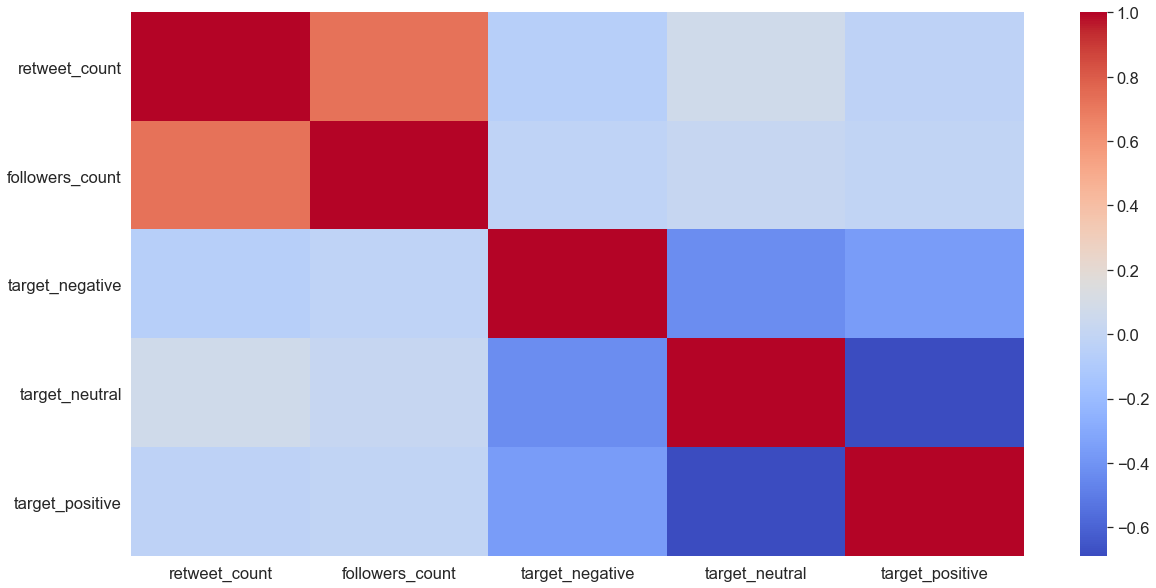

In [20]:
# correlation plot 
fig,ax = plt.subplots(figsize=(20,10))
c = data2.corr()
sns.heatmap(c,cmap='coolwarm')
plt.show()

## Wordcloud

In [21]:
def wc(data,bgcolor,stopWords):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, 
                   max_words = 100,
                   width =1600,
                   height = 800,
                  stopwords=stopWords)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [22]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['google','googl','goog','stocks','stock','alphabet','fb','spx','apple','qqq','amazon','msft','amzn','spy','btc','amd','nflx','wmt','tsla','nvda']


#### Many people referenced the same popular stocks in their tweets, as well as references to index funds, regardless of which stock I examined. They obscured other more valuable indicators of sentiment, so I chose to include those in the stopword list. 

### Word Cloud for Positive tweets

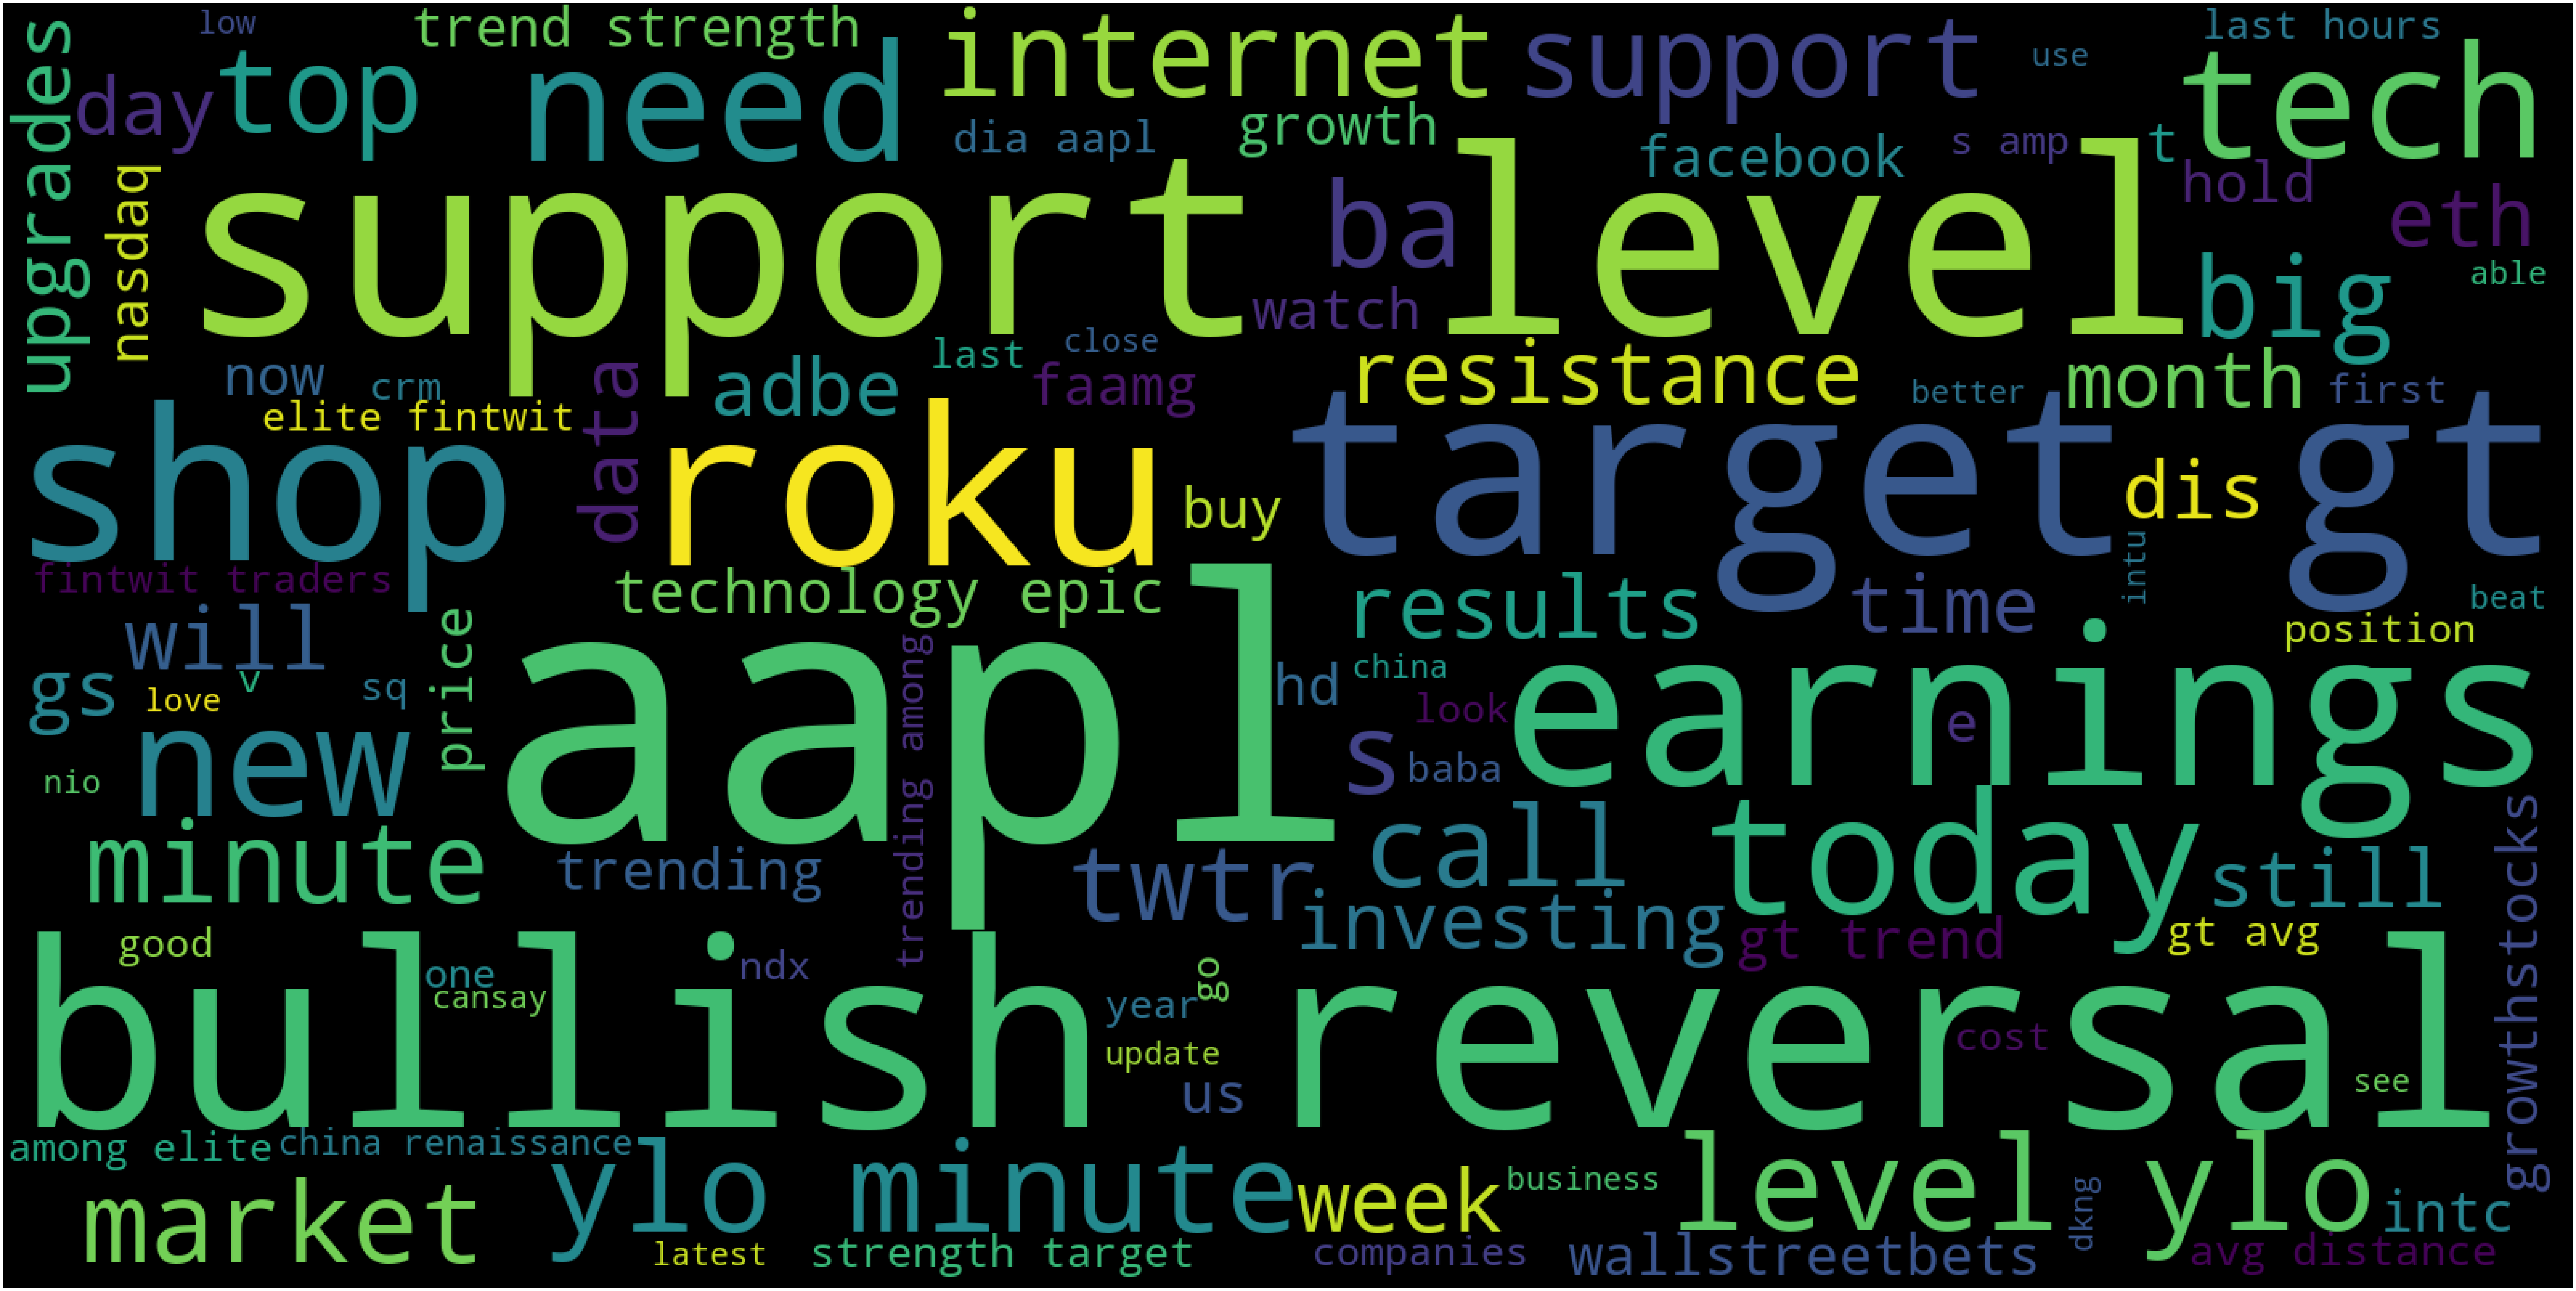

In [23]:
wc(data_positive.tweet_text,'black',customStopwords )

### Word Cloud for Neutral Tweets

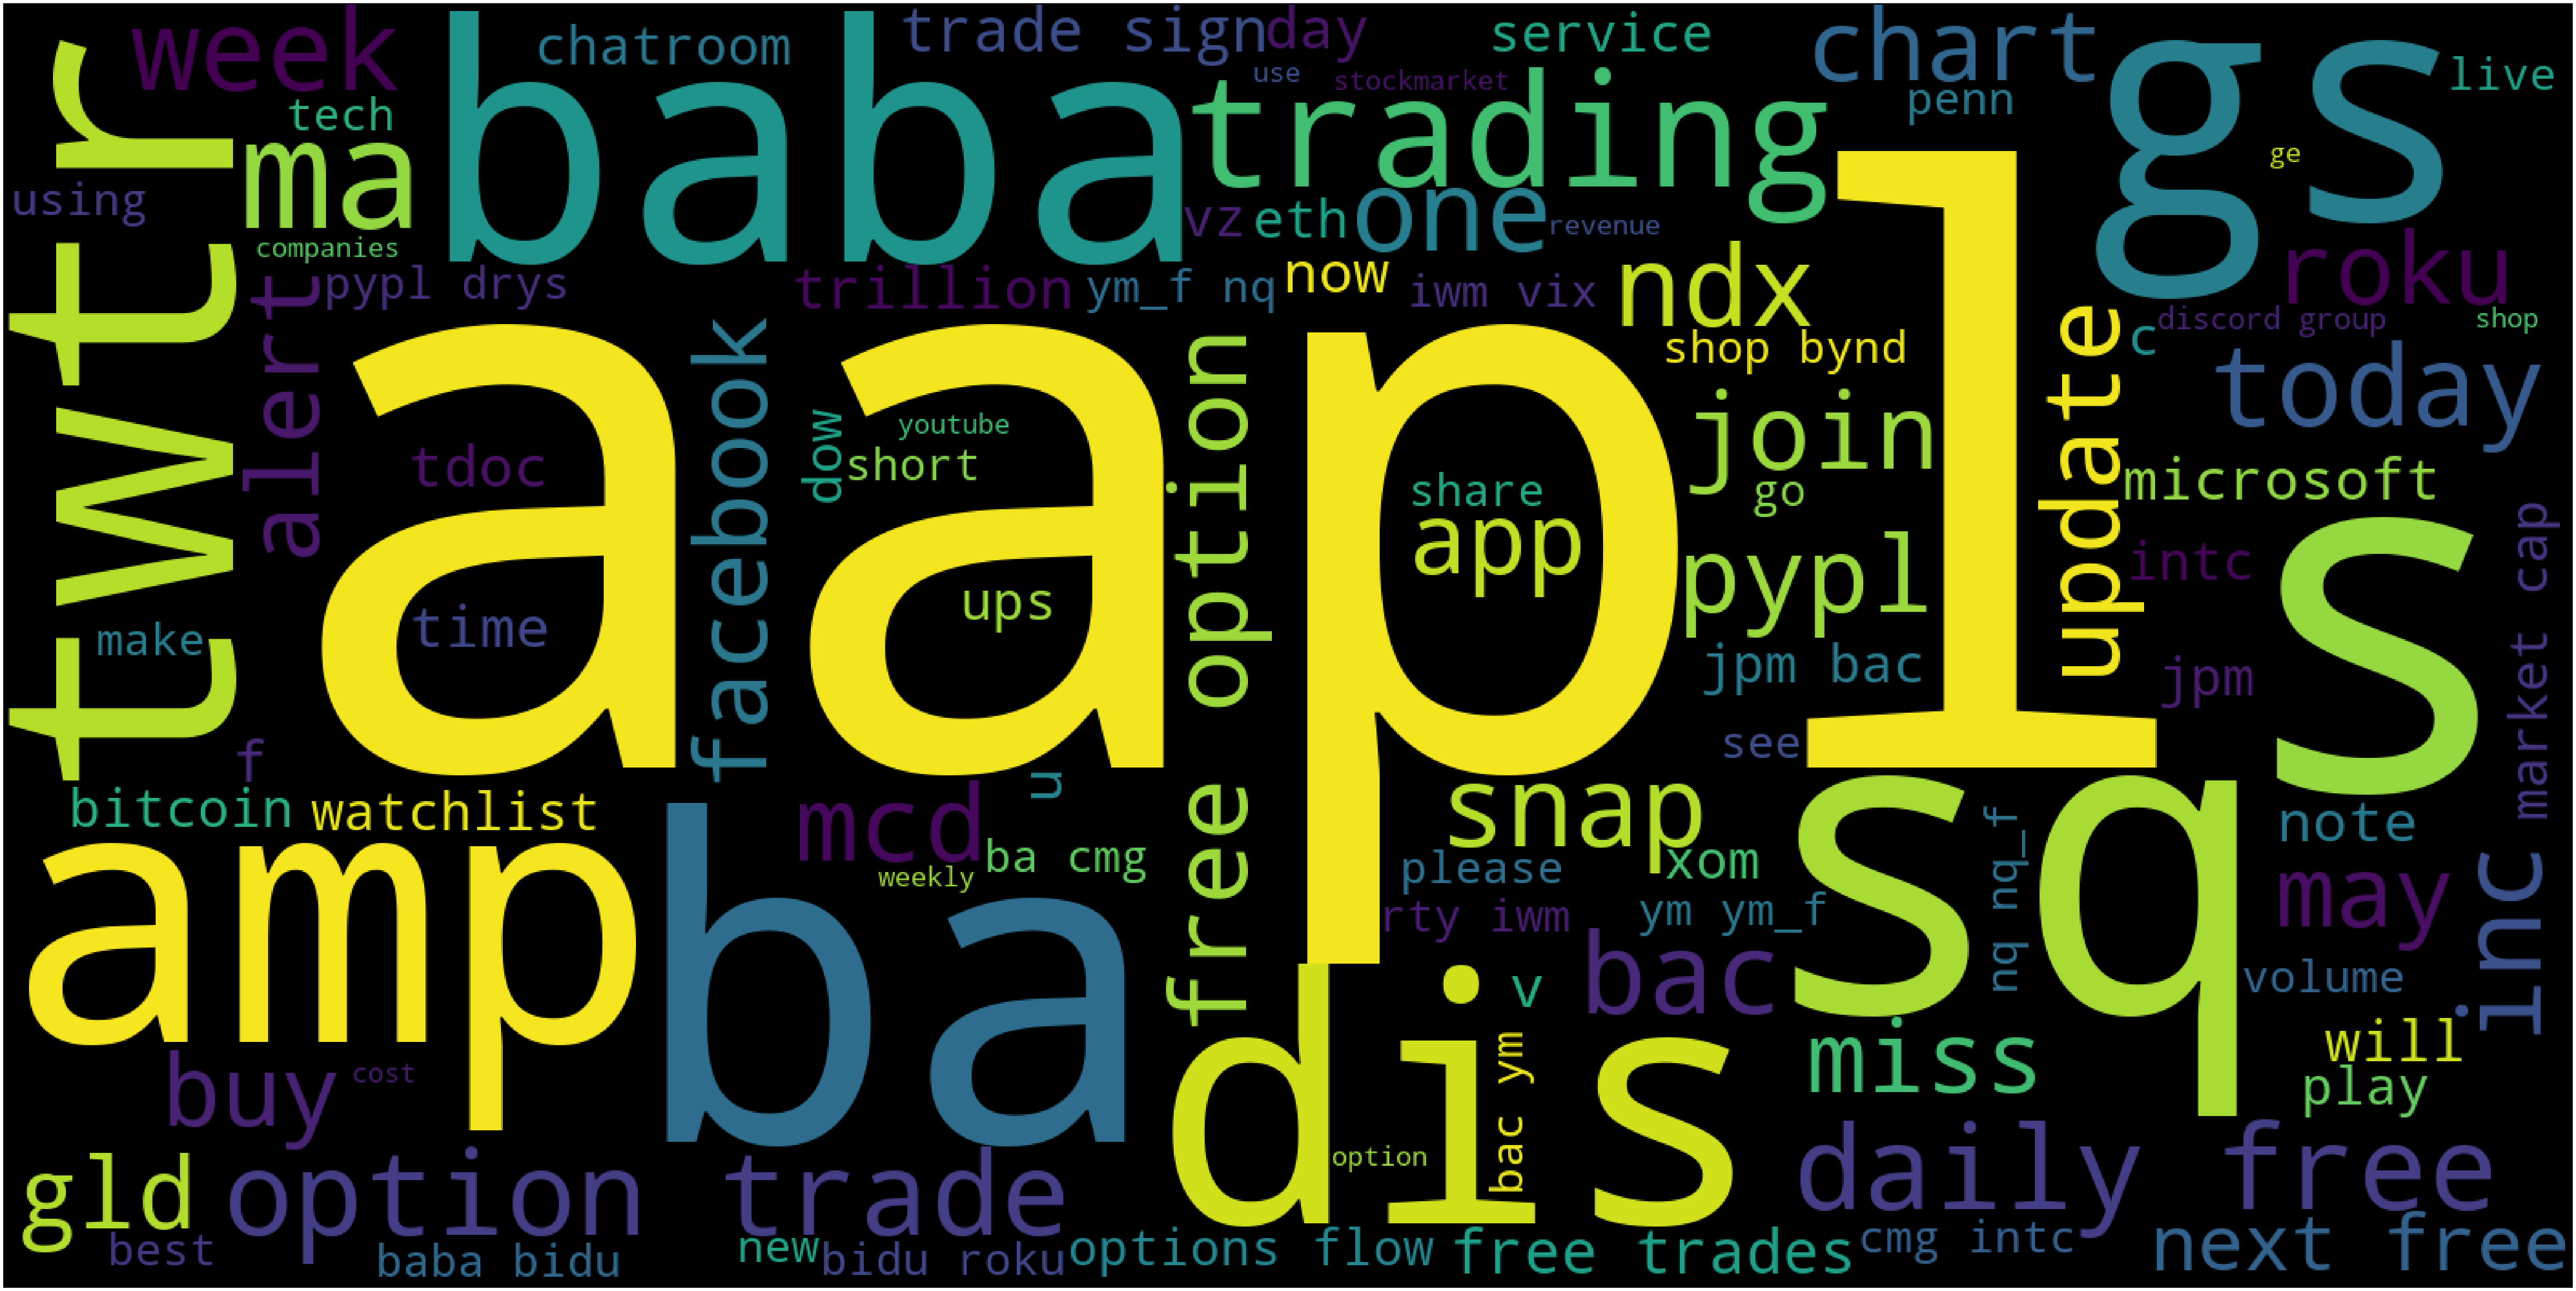

In [24]:
wc(data_neutral.tweet_text,'black',customStopwords )

### Word Cloud for Negative Tweets

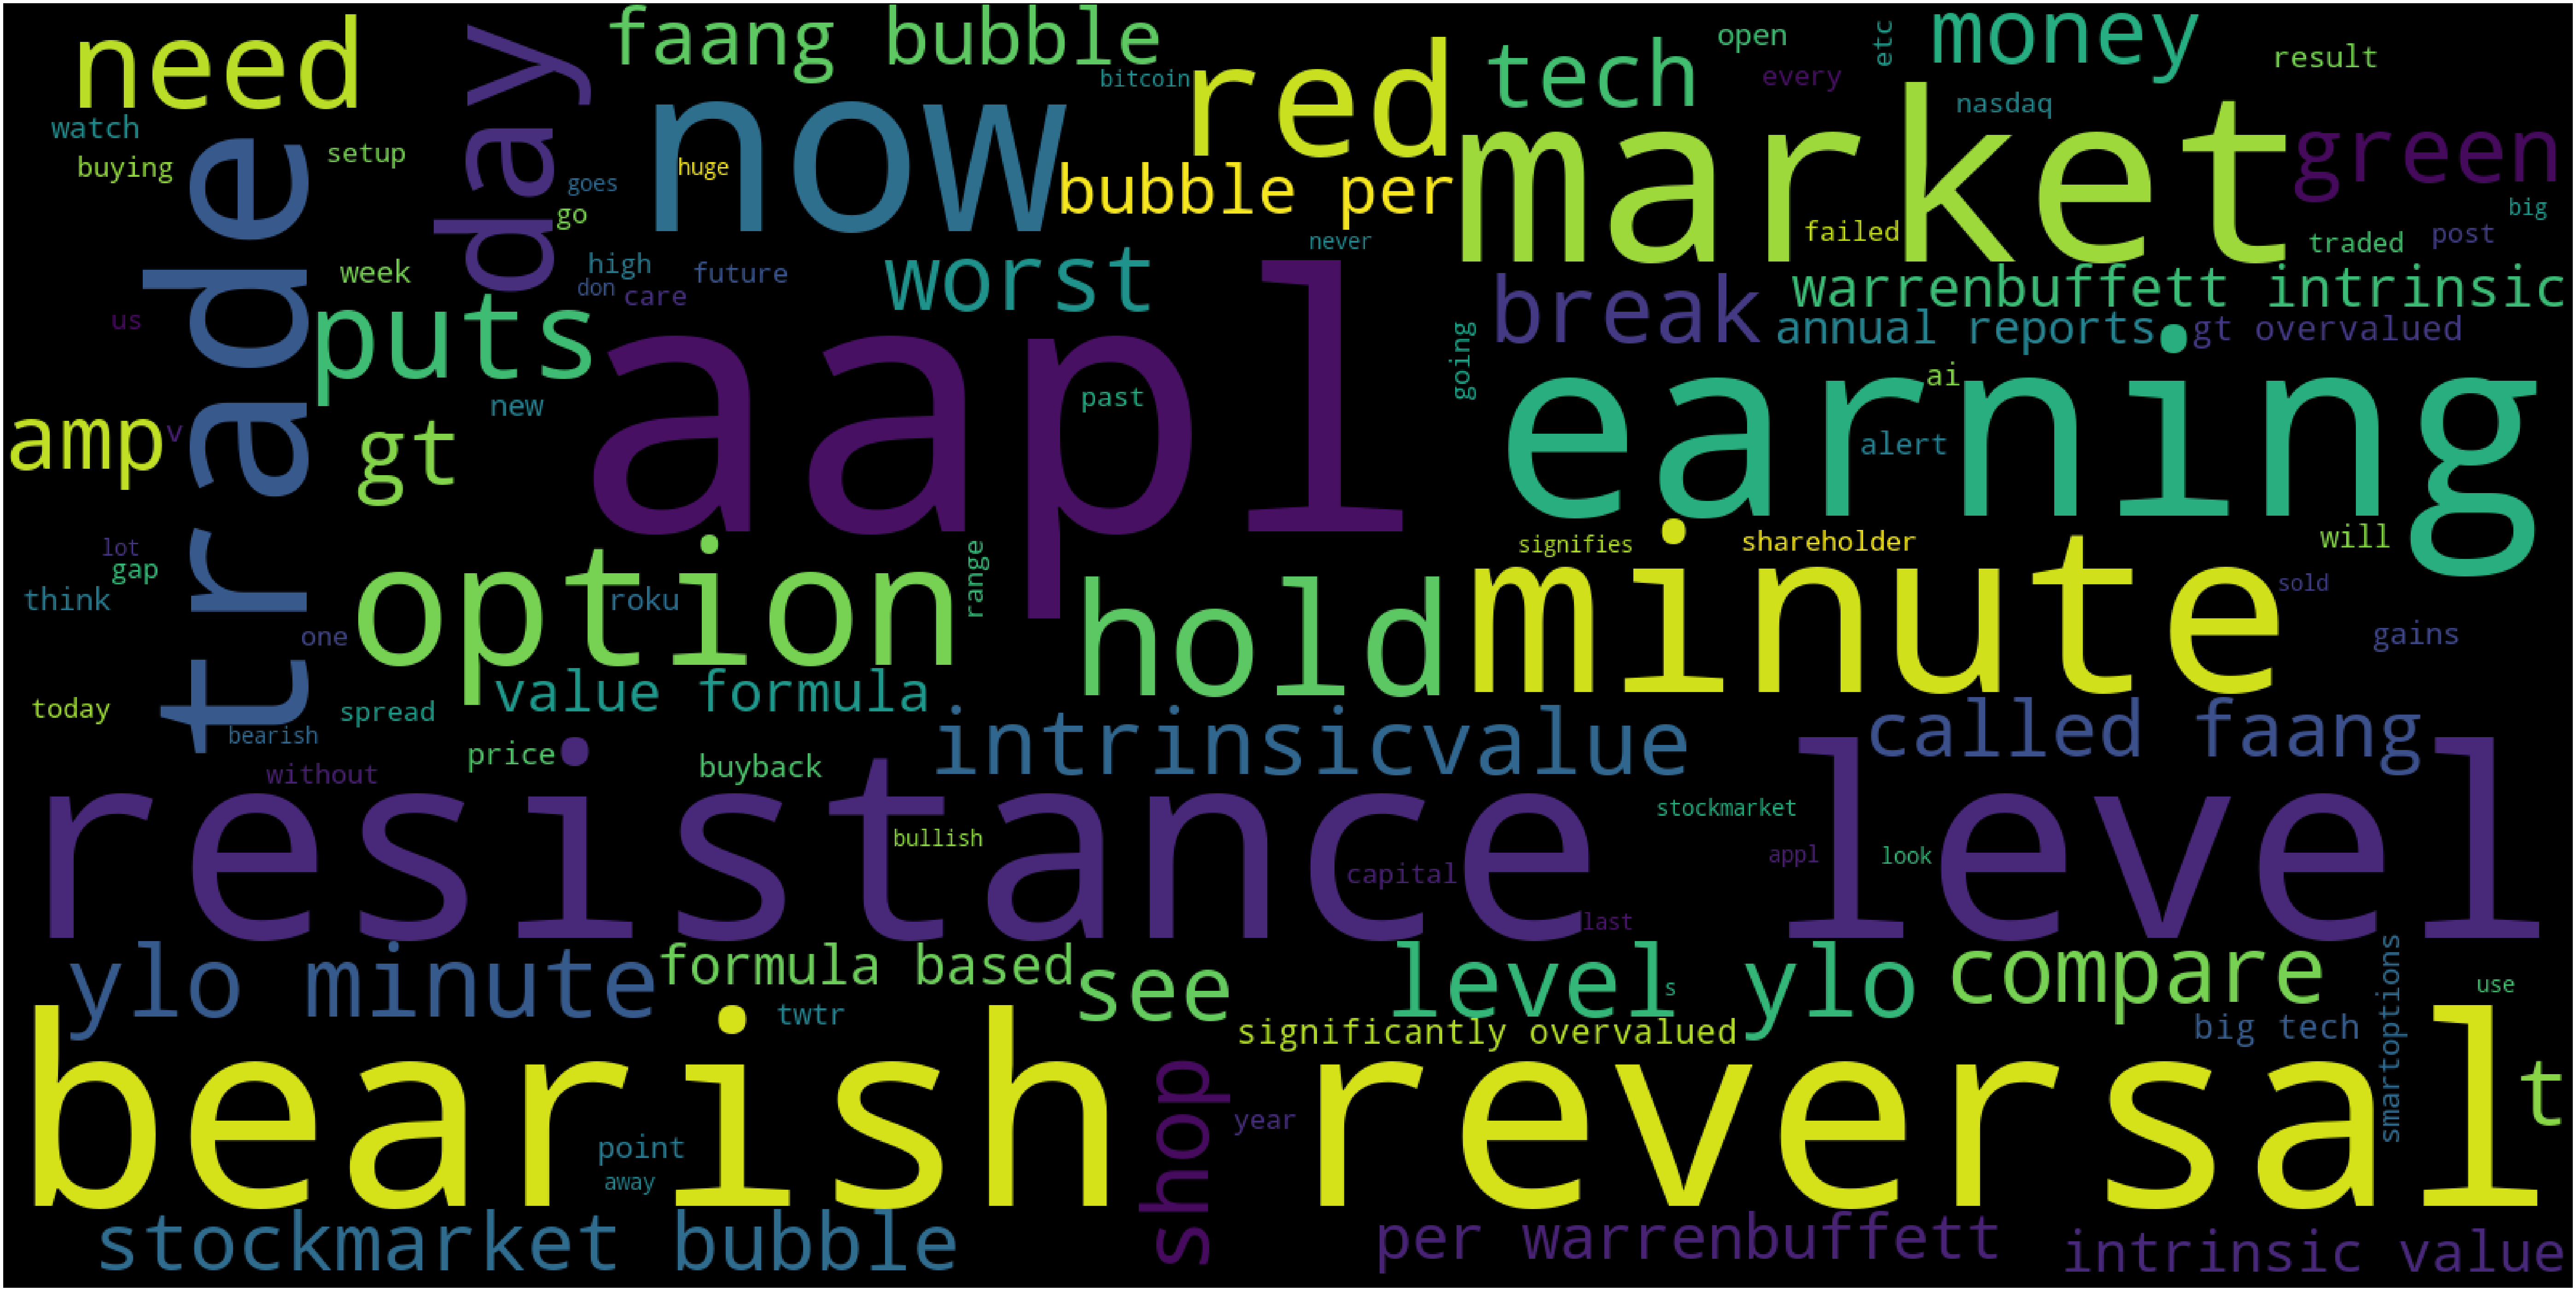

In [25]:
wc(data_negative.tweet_text,'black',customStopwords )

# Sentiment Analysis

## Lexicon-Based Methods
### There are rule-based models, where sentiment is ranked by a pre-defined dictionary. There is no learning involved.


### Fetching sentiment with textblob

In [26]:
# sentiment prediction
def textblob_sentiment(text):
    sentiment = []
    for i in text: 
        analysis = TextBlob(i)
        # set sentiment 
        if analysis.sentiment.polarity > 0:
            sentiment.append('positive')
        elif analysis.sentiment.polarity < 0:
            sentiment.append('negative')
        else:
             sentiment.append('neutral')
    return sentiment

In [27]:
# adding textblob sentiment to dataframe
data['textblob'] = textblob_sentiment(data.tweet_text)

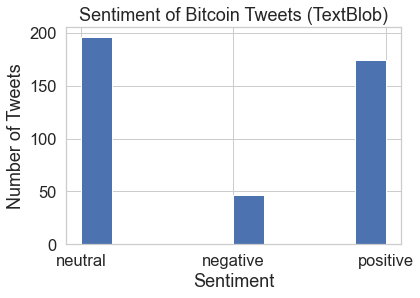

In [28]:
#plotting sentiment score results
plt.hist(data.textblob)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (TextBlob)')
plt.show()

###  Vader

In [30]:
def vader_sentiment(text):
    sentiment = []
    for i in text: 
        sid = SentimentIntensityAnalyzer()
        # set sentiment 
        ss = sid.polarity_scores(i)
        if ss["compound"] > 0:
            sentiment.append('positive')
        elif ss["compound"] < 0:
            sentiment.append('negative')
        else:
            sentiment.append('neutral')
    return sentiment

In [31]:
def vader_scores(text):
    sentiment={}

In [32]:
vader_sentiment(['Bitcoin is Awesome Man.'])

['positive']

In [33]:
vader_sentiment(['Bitcoin sucks.'])

['negative']

In [34]:
# adding vader sentiment to dataframe
data['vader'] = vader_sentiment(data.tweet_text)

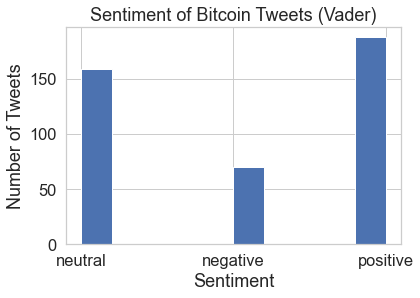

In [35]:
# Plotting vader sentiment score distribution
plt.hist(data.vader)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (Vader)')
plt.show()

In [36]:
# textblob Accuracy
accuracy_score(data.target,data.textblob)

0.5035971223021583

In [37]:
# Vader Accuracy
accuracy_score(data.target,data.vader)

0.4892086330935252

# Machine Learning Models
## 70/30 train/test split validation

In [38]:
data_train, data_test = train_test_split(data, test_size=0.3)

data = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
data.fit(data_train.tweet_text)
xtrain = data.transform(data_train.tweet_text)
xtest = data.transform(data_test.tweet_text)

ytrain = data_train.target
ytest = data_test.target

### Model Optimization (Grid Search)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
def modelOptimization(clf,grid,x,y):
        #Input is the classifier,grid,x,and y.
        #performs Random Grid Search Using 5-fold Cross Validation
        #outputs the best model and accuracy
        clfmodel = RandomizedSearchCV(estimator = clf,n_iter=200,param_distributions = grid,scoring='accuracy', cv=5,verbose =1, random_state=2021,n_jobs=-1)
        clfmodel.fit(x,y)
        print('Model Best Score: \n',clfmodel.best_score_)
        print('Model Best Parameters: \n',clfmodel.best_params_)

## Accuracy

In [40]:
def get_accuracy(model):
    # fits model to the training set
    model.fit(xtrain, data_train.target)
    
    # Validates Accuracy on the test set 
    preds = model.predict(xtest)
    accuracy = accuracy_score(data_test.target.values, preds)
    print(f"Accuracy = {accuracy}")

### Logistic Regression

In [41]:
# Cross-Validated Grid Search
from sklearn.model_selection import GridSearchCV

loggrid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()

modelOptimization(logreg,loggrid,xtrain,ytrain)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Model Best Score: 
 0.6460549386323787
Model Best Parameters: 
 {'penalty': 'l2', 'C': 1000.0}


In [42]:
# Best Logistic Regression Model
lrmodel = LogisticRegression(penalty = 'l2',C=1,max_iter=500)

# Validating Accuracy
get_accuracy(lrmodel)

Accuracy = 0.6904761904761905


### SVM

In [43]:
from sklearn import svm
svcgrid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']} 
svc = svm.SVC()

modelOptimization(svc,svcgrid,xtrain,ytrain)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Model Best Score: 
 0.6357101110461718
Model Best Parameters: 
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


In [44]:
# Best Model
svcmodel = svm.SVC(kernel='rbf',gamma=0.01,C=10)

# Validating Accuracy
get_accuracy(svcmodel)

Accuracy = 0.6825396825396826


## Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfgrid = random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf = RandomForestClassifier()
modelOptimization(rf,rfgrid,xtrain,ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Model Best Score: 
 0.6563413208649912
Model Best Parameters: 
 {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


In [46]:
# Best Random Forest Model
rfmodel = RandomForestClassifier(n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=100,bootstrap=False)

# Validating Accuracy
get_accuracy(rfmodel)

Accuracy = 0.7301587301587301


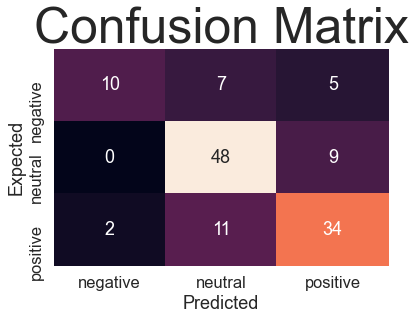

In [51]:

from sklearn.metrics import confusion_matrix
preds = rfmodel.predict(xtest)
confusion_matrix =  pd.crosstab(index=ytest, columns=preds.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 50)
plt.show()

## XG BOOST

In [47]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
# Grid
xgbgrid = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 101, num = 25)],    # optimizing number of trees and tree depth
               'max_depth': [9,10,11,12,None],
              'subsample':[i/10 for i in range (7,11)],
               'colsample_bytree': [i/10 for i in range (7,11)],
                 'alpha:': [0.5,1,5]}
xgb = XGBClassifier()
modelOptimization(xgb,xgbgrid,xtrain,ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[01:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { alpha: } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Best Score: 
 0.649561659848042
Model Best Parameters: 
 {'subsample': 0.7, 'n_estimators': 5, 'max_depth': 9, 'colsample_bytree': 0.9, 'alpha:': 1}


In [48]:
# Best XGBoost model
xgbmodel = XGBClassifier(subsample=0.9,n_estimators=21,max_depth=9,colsample_bytree=0.7,alpha=0.5)

# Validating Accuracy
get_accuracy(xgbmodel)

[01:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.7142857142857143


### Evaluation